In [2]:
# Hello, this is my Titanic Data Analysis Project, completed with the Data Analysis and Machine Learning Bootcamp from Udemy. 
# When performing Data Analysis, one typically wants to extract something from Data and learn about what implications it might
# have. On this project, there are 5 questions I answered by obtaining certain data. Those five questions are:
# 1.) Who were the passengers on the Titanic? (Ages,Gender,Class,..etc)
# 2.) What deck were the passengers on and how does that relate to their class?
# 3.) Where did the passengers come from?
# 4.) Who was alone and who was with family?
# 5.) What factors helped someone survive the sinking?
# We will first find out the answer to question 1, but first we must import all of our Data Analysis packages from pandas,
# numpy, seaborn, and matplotlib.pyplot to work with this data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import Series and DataFrame, two important modules that create a framework/scaffolding to analyze the data with simplicity. 
from pandas import Series,DataFrame

In [4]:
# Read the Titanic data csv file and transfer it into a DataFrame
titanic_data = pd.read_csv('train.csv')

In [5]:
# Display the first five rows of this DataFrame 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Overall info for the DataFrame 
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


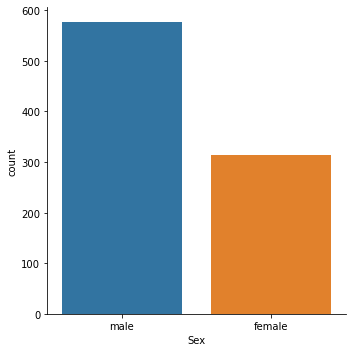

In [7]:
# Let's start with question 1. I will start by getting a bar graph for the number of each sex on the boat. 
sns.catplot(x='Sex',kind='count',data= titanic_data)

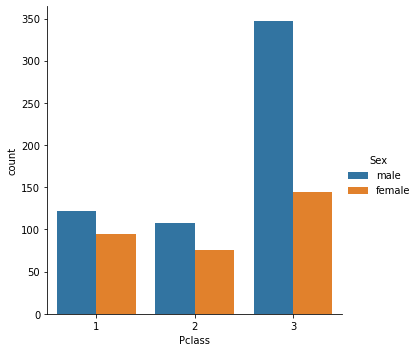

In [8]:
# I will then seperate the genders into which class they are in by changing the hue of the bars on the bar graph and displaying
# the class on the x-axis. Interestingly, we can see males vastly outnumber women in the third class. We can learn more from 
# this by separating Men,Women,and Children. But how can we do this?

sns.catplot(x='Pclass',kind ='count',data=titanic_data,hue='Sex')

In [9]:
# We can do this by treating any person under the age of 16 as a child, and then using the apply method to create a new column. 
# We will accomplish this by creating a function that filters out the age of each passenger. 

def man_woman_child(passenger):
    
    age,sex = passenger
    
    if age < 16 :
        return 'child'
    else:
        return sex
    

In [10]:
# Call the new column 'person' and specify axis=1 for columns and not index/ 
titanic_data['person'] = titanic_data[['Age','Sex']].apply(man_woman_child,axis=1)

In [11]:
# Display first ten rows of the DataFrame to see if our function worked.
titanic_data[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


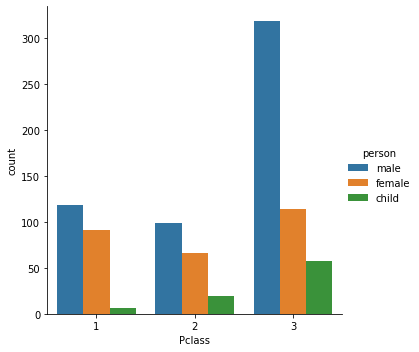

In [12]:
# Now, I will create a bar graph of each class again, with children now being taken into consideration. What we can learn from 
# this is there were far more children in the third class than in the first. We can create a histogram to filter out age of 
# the passenger more precisely.
sns.catplot(x='Pclass',kind ='count',data=titanic_data,hue='person')

<AxesSubplot:>

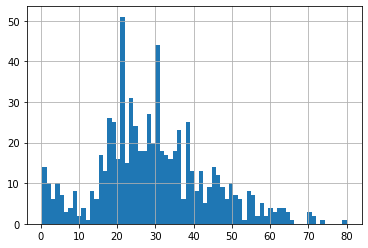

In [13]:
# Create histogram of passenger ages, we see the ages of passengers range from infancy to 80 years old. Most passengers were
# approximately 14- 40.
titanic_data['Age'].hist(bins=70)

In [14]:
# Getting a precise count of how many Men,Women, and Children were passengers on the Titanic. 
titanic_data['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

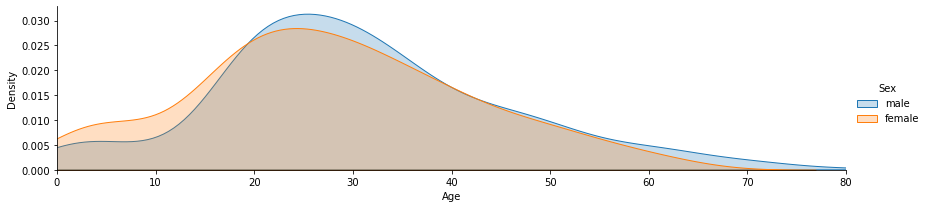

In [16]:
# FacetGrid can also be used to plot multiple kdeplots on one graph to roughly analyze the age of each passenger by sex.

# First, set visual as FacetGrid using the Titanic DataFrame as the source for data, change the hue for each sex, and change 
# the aspect ratio. 
visual = sns.FacetGrid(titanic_data,hue='Sex',aspect=4)
# Use map to plot all possible kdeplots for the 'Age' column by hue choice. 
visual.map(sns.kdeplot,'Age',shade=True)
# Set limit to x-axis by the oldest person on board. 
oldest = titanic_data['Age'].max()
# Set lower x-axis limit at 0
visual.set(xlim=(0,oldest))
# Add legend. 
visual.add_legend()

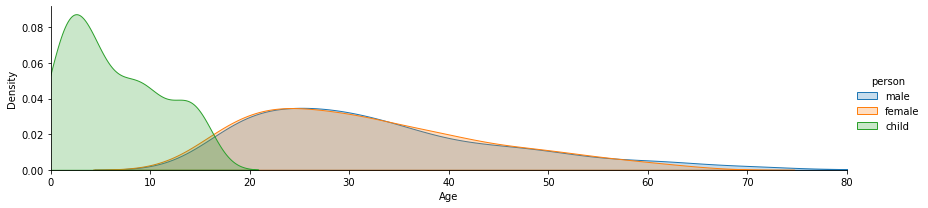

In [17]:
# I can do the same thing for the 'person' column to include children
visual = sns.FacetGrid(titanic_data,hue='person',aspect=4)

visual.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_data['Age'].max()

visual.set(xlim=(0,oldest))

visual.add_legend()

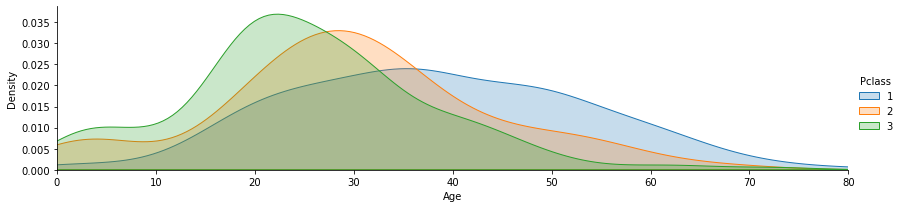

In [18]:
# I can also incorporate class by changing the hue to represent it. 

visual = sns.FacetGrid(titanic_data,hue='Pclass',aspect=4)

visual.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_data['Age'].max()

visual.set(xlim=(0,oldest))

visual.add_legend()

In [19]:
# We have essentially answered question 1 analytically, so now we may move on into question 2: What deck were the passengers on 
# and how does it relate to class? We can start by bringing up the DataFram again. As we can see, the Cabin column has info on
# the deck, but the only problem is the amount of NaN values. We must drop those before we can begin to analyze. 

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [20]:
# Let's reorganize a new Dataframe that takes the Cabin column and drops the NaN values. 
deck = titanic_data['Cabin'].dropna()

In [21]:
# Quick preview of decks. We only need the first letter of the deck to classify the level. 
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

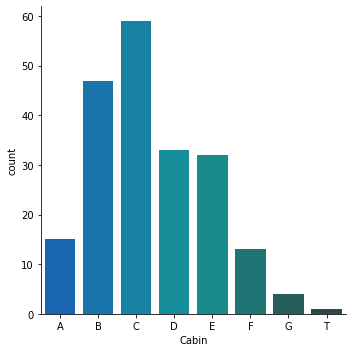

In [40]:
# We can figure out which deck had how many people in it with a for loop. 
# Set empty list 
levels = []
# For loop grabs first letter in cabin name
for level in deck:
    levels.append(level[0])
# Reset the data frame and use the bar graph to plot out cabin numbers.     
cabin_data = DataFrame(levels)
cabin_data.columns = ['Cabin']
sns.catplot(x='Cabin',data=cabin_data,kind='count',palette='winter_d',order=['A','B','C','D','E','F','G','T'])

In [27]:
# For some reason a T value was returned, we can just remove this by redefining the DataFrame as everything but where the row
# was equal to T.
cabin_data = cabin_data[cabin_data.Cabin != 'T']

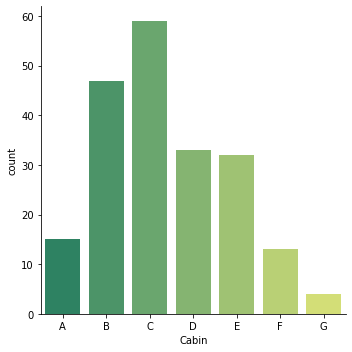

In [41]:
# Replot
sns.catplot(x = 'Cabin',data=cabin_data,kind = 'count',palette = 'summer',order=['A','B','C','D','E','F','G'])

In [29]:
# Now that we have answered our second question, we can now move into question 3: where did the passengers come from? If we 
# look at the Embarked column, we see that every passenger has a C,Q,or S value on their profile. Kaggle, which is where this 
# data was obtained from, has these letters correspond to the cities of Cherbourg, Queenstown, and Southhampton in England. 
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


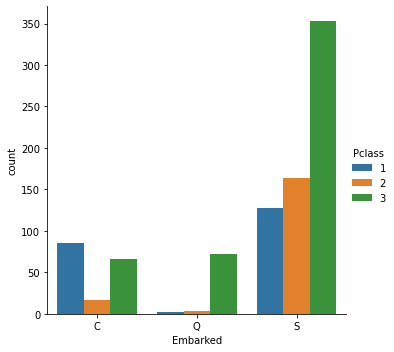

In [37]:
# We can arrange these letters and the amount of times they appear in the dataset into another bargraph to get exact counts on 
# how many people came from each location and which class they were a part of as listed in the colored legend. 
# Interestingly, almost every person coming from Queensbury was a 3 class passenger. 
sns.catplot(x='Embarked',kind ='count',data=titanic_data,hue='Pclass',order=['C','Q','S'])

In [42]:
# Now that we have answered our third question, we can begin to work on question 4: Who was alone and who was with family?
# We can start by creating a new column to define alone. We will add the parent/child column with the sibsp column.
titanic_data['Alone'] = titanic_data.Parch + titanic_data.SibSp

In [43]:
# We can see from this that if the Alone column has a value other than 0, the person was not alone and with family.

titanic_data['Alone']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    3
889    0
890    0
Name: Alone, Length: 891, dtype: int64

In [44]:
# Let's filter this out so that if the value in Alone > 0 , it will display as 'With Family' and if Alone = 0, it will display
# 'Alone'.
titanic_data['Alone'].loc[titanic_data['Alone']>0] = 'With Family'
titanic_data['Alone'].loc[titanic_data['Alone']==0] = 'Alone'

C:\Users\dietr\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
# As we can see, it worked
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


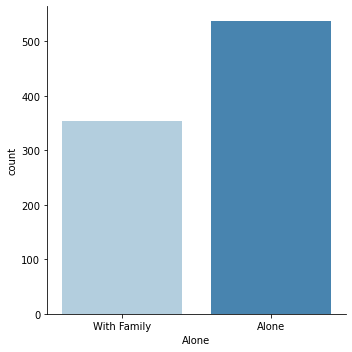

In [47]:
# Let's make a bar graph again to get an exact count on who is alone and who isn't
sns.catplot(x='Alone',kind='count',data=titanic_data,palette='Blues')

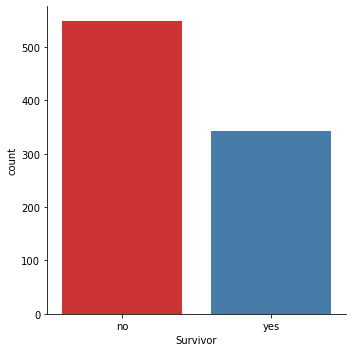

In [52]:
# Now we can answer our final question: What factors helped someone survive the sinking? 

# We can start by creating a new column with mapping
titanic_data['Survivor'] = titanic_data.Survived.map({0:'no',1:'yes'})
# Let's quickly get a comparison of who died vs. who survived. 
sns.catplot(x='Survivor',kind ='count',data=titanic_data,palette='Set1')
# As we can see, more people died than survived. Let's see if class has anything to do with this. 

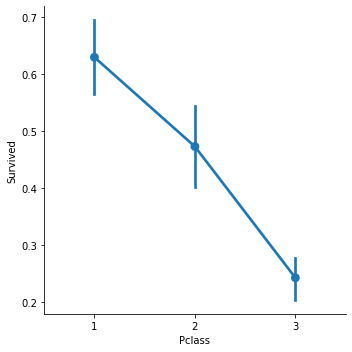

In [5]:
# We will create a point plot with an emphasis on class to see if there is indeed a connection between death and class.
sns.catplot(x='Pclass',y='Survived',kind ='point',data=titanic_data)
# As we can see from here, third class does appear to have a substaintially lower survival rate in comparison to the other two. 
# This is possibly due to the large amount of men in the third class along with the women and children first policy.
# Let's confirm this by using 'hue' to get a clearer picture

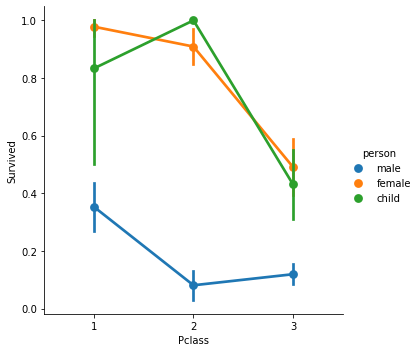

In [56]:
# Let's create another point plot, this time taking class and gender into consideration.
sns.catplot(x='Pclass',y='Survived',kind ='point',hue='person',data=titanic_data)
# As we can see here, being a male or being in third class were not favorable conditions for surviving the Titanic. 
# It seems the trend is that being a male in general on the Titanic was not good in terms of surviving. 
# Did age play in role in how likely one was to survive? Let's see. 

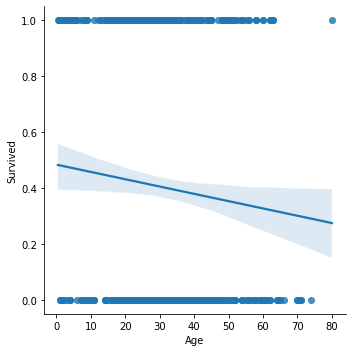

In [58]:
# Create a linear regression plot for age vs. survival
sns.lmplot(x='Age',y='Survived',data=titanic_data)
# As seen here, the general trend is that the older a passenger was, the less likely they were to survive the sinking. 

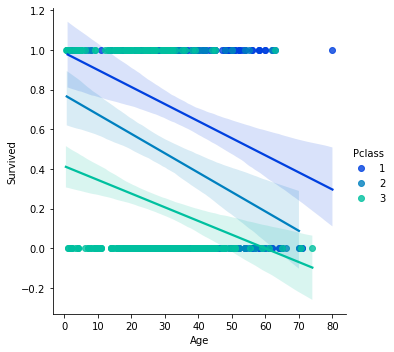

In [59]:
# Let's update our linear plot and change the hue for Classes 
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_data,palette='winter')

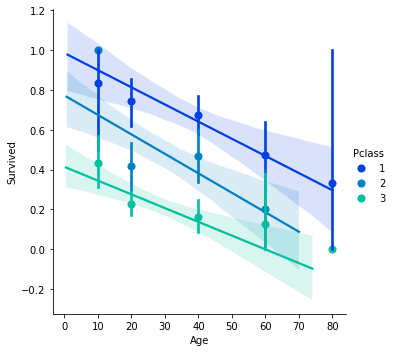

In [60]:
# As well as the previous update, we can use the x_bins argument to clean up this figure and bin it by age with an attached 
# standard deviation 
generations=[10,20,40,60,80]
sns.lmplot(x='Age',y='Survived',hue='Pclass',data=titanic_data,palette='winter',x_bins=generations)
# As we can see, the older first class passengers have an interesting standard deviation and look more likely to survive. 

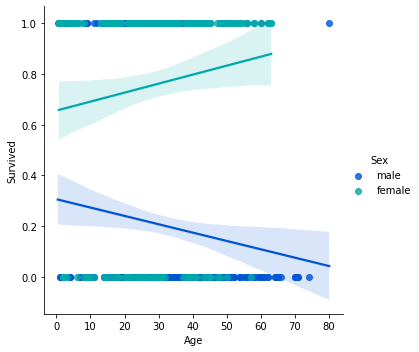

In [61]:
# What if we relate survival to the sex of the passanger?
sns.lmplot(x='Age',y='Survived',hue='Sex',data=titanic_data,palette='winter')
# As we see here, it appears older women were much more likely to survive than older men. It can also be interpreted from this 
# data that men of all ages were in general less likely to survive than women of all ages. 